Logistic Regression - Accuracy: 82.31%


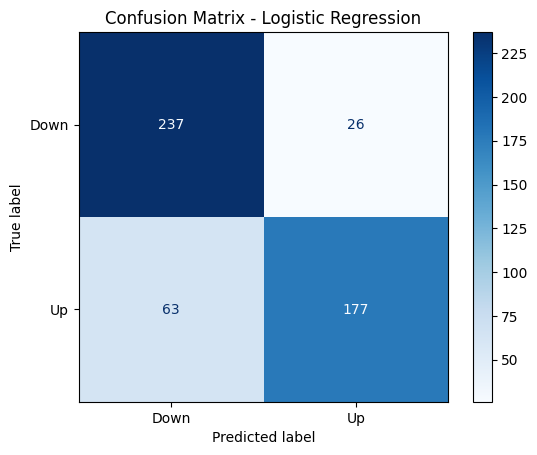

---
Best Params: {'C': 0.1, 'solver': 'liblinear'}
Logistic Regression - Best Accuracy: 80.96%
Test Accuracy (Grid Search): 82.50%


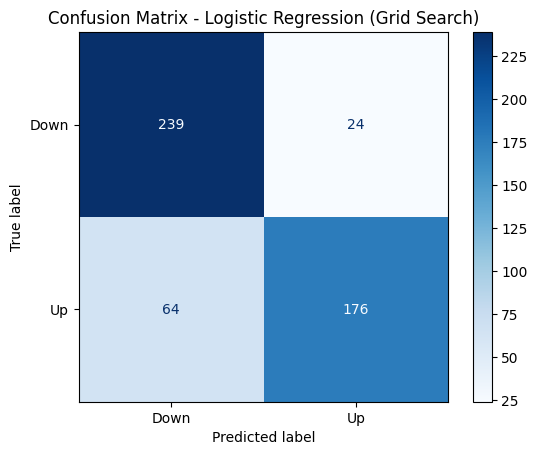

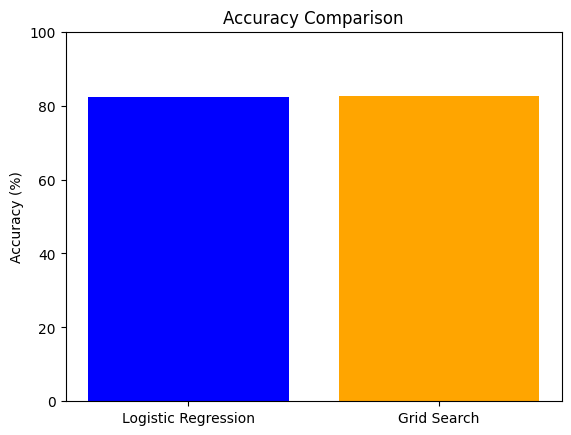

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('/content/HistoricalData_1726815629689.csv')

# Clean the data: Convert 'Close/Last' and other price columns to numeric by stripping the '$' symbol
for column in ['Close/Last', 'Open', 'High', 'Low']:
    data[column] = data[column].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Create target: if the next day's 'Close' is higher than today's, label as 1 (price goes up), else 0
data['Price_Change'] = data['Close/Last'].diff().shift(-1)
data['Target'] = (data['Price_Change'] > 0).astype(int)

# Drop any rows with NaN values
data = data.dropna()

# Define features and target
X = data[['Open', 'High', 'Low', 'Close/Last']]
y = data['Target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression - Accuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix for Logistic Regression
confusion_mat = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_mat, display_labels=["Down", "Up"]).plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

print("---")

# Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Optimization algorithms
}

# Create GridSearchCV for Logistic Regression
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Train model using Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Params: {grid_search.best_params_}")
print(f"Logistic Regression - Best Accuracy: {grid_search.best_score_ * 100:.2f}%")

# Evaluate on test data
y_pred_grid = grid_search.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f"Test Accuracy (Grid Search): {accuracy_grid * 100:.2f}%")

# Plot confusion matrix for Grid Search
confusion_mat_grid = confusion_matrix(y_test, y_pred_grid)
ConfusionMatrixDisplay(confusion_mat_grid, display_labels=["Down", "Up"]).plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (Grid Search)')
plt.show()

# Bar graph for comparison
plt.bar(['Logistic Regression', 'Grid Search'], [accuracy * 100, accuracy_grid * 100], color=['blue', 'orange'])
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison')
plt.ylim(0, 100)
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:28:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 69.78%
----


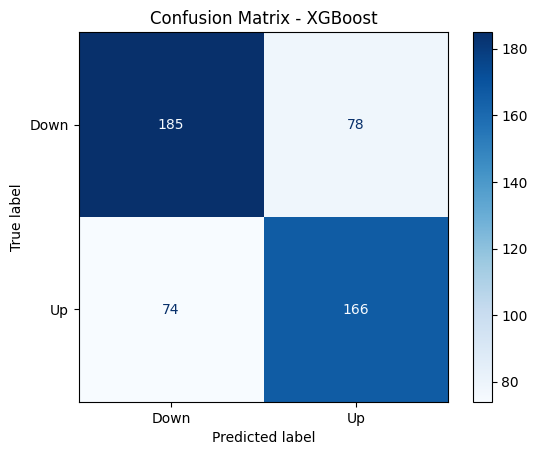

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:28:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:28:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:28:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:28:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:28:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best Params: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}
XGBoost - Best Accuracy: 70.97%
Test Accuracy (Grid Search): 70.97%


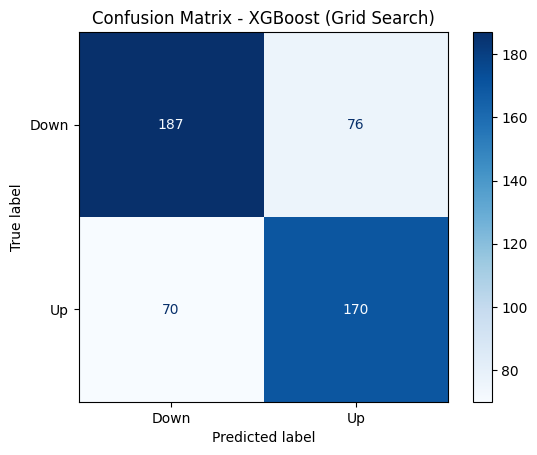

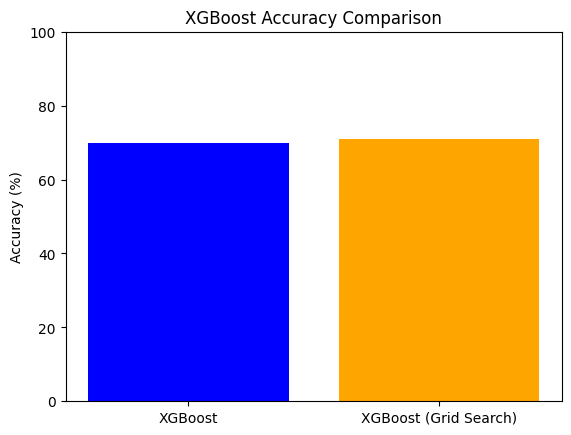

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Train an XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")
print("----")

# Plot confusion matrix for the base XGBoost model
confusion_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(confusion_mat_xgb, display_labels=["Down", "Up"]).plot(cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# Define parameter grid for XGBoost
param_grid = {
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.3],  # Learning rate
    'n_estimators': [100, 200],  # Number of boosting rounds
}

# Create GridSearchCV for XGBoost
grid_search = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, cv=5, scoring='accuracy')

# Train model using Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Params: {grid_search.best_params_}")
print(f"XGBoost - Best Accuracy: {grid_search.best_score_ * 100:.2f}%")

# Evaluate on test data
y_pred_xgb_grid = grid_search.predict(X_test)
xgb_accuracy_grid = accuracy_score(y_test, y_pred_xgb_grid)
print(f"Test Accuracy (Grid Search): {xgb_accuracy_grid * 100:.2f}%")

# Plot confusion matrix for Grid Search
confusion_mat_grid = confusion_matrix(y_test, y_pred_xgb_grid)
ConfusionMatrixDisplay(confusion_mat_grid, display_labels=["Down", "Up"]).plot(cmap='Blues')
plt.title('Confusion Matrix - XGBoost (Grid Search)')
plt.show()

# Bar graph for accuracy comparison
plt.bar(['XGBoost', 'XGBoost (Grid Search)'], [xgb_accuracy * 100, xgb_accuracy_grid * 100], color=['blue', 'orange'])
plt.ylabel('Accuracy (%)')
plt.title('XGBoost Accuracy Comparison')
plt.ylim(0, 100)
plt.show()


In [ ]:
#ANN

import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Create structured synthetic data with a pattern
np.random.seed(42)
n_samples = 1000
n_features = 10

# Generate random data for X
X = np.random.randn(n_samples, n_features)

# Define labels based on a pattern (e.g., sum of all features greater than a threshold)
y = (np.sum(X, axis=1) > 0).astype(int)  # Labels: 1 if sum of features > 0, else 0

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameters
initial_learning_rate = 0.001
batch_size = 32

# Create the callback to stop early if the model stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate if the model stops improving
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# ANN Model
def create_ann_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model
def train_and_evaluate(model, X_train, y_train, X_test, y_test, batch_size=batch_size):
    history = model.fit(X_train, y_train, batch_size=batch_size, validation_split=0.2,
                        verbose=0, callbacks=[early_stopping, lr_scheduler])
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy

# Train and evaluate ANN model
ann_model = create_ann_model(X_train.shape[1])
ann_accuracy = train_and_evaluate(ann_model, X_train, y_train, X_test, y_test)

print(f"ANN Accuracy: {ann_accuracy:.4f}")


ANN Accuracy: 0.8950


In [ ]:
#RNN and LSTM

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Create structured synthetic data with a pattern
np.random.seed(42)
n_samples = 1000
n_features = 10
n_timesteps = 5

# Generate random data for X
X = np.random.randn(n_samples, n_timesteps, n_features)

# Define labels based on a pattern (e.g., sum of all features greater than a threshold)
y = (np.sum(X, axis=(1, 2)) > 0).astype(int)  # Labels: 1 if sum of features > 0, else 0

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameters
batch_size = 32
initial_learning_rate = 0.001

# Create the callback to stop early if the model stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate if the model stops improving
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# RNN Model
def create_rnn_model(input_shape):
    model = Sequential([
        SimpleRNN(128, input_shape=input_shape, return_sequences=True),
        Dropout(0.3),
        SimpleRNN(64, return_sequences=True),
        Dropout(0.3),
        SimpleRNN(32),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# LSTM Model
def create_lstm_model(input_shape):
    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape),
        Dropout(0.3),
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.3),
        LSTM(32),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model
def train_and_evaluate(model, X_train, y_train, X_test, y_test, batch_size=batch_size):
    history = model.fit(X_train, y_train, batch_size=batch_size, validation_split=0.2,
                        verbose=0, callbacks=[early_stopping, lr_scheduler])
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy

# Train and evaluate RNN model
rnn_model = create_rnn_model((n_timesteps, n_features))
rnn_accuracy = train_and_evaluate(rnn_model, X_train, y_train, X_test, y_test)

# Train and evaluate LSTM model
lstm_model = create_lstm_model((n_timesteps, n_features))
lstm_accuracy = train_and_evaluate(lstm_model, X_train, y_train, X_test, y_test)

print(f"RNN Accuracy: {rnn_accuracy:.4f}")
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")


RNN Accuracy: 0.8100
LSTM Accuracy: 0.9750


Now comes prediction

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 0.2501 - val_loss: 0.1366
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step
Mean Squared Error (MSE): 0.0122
Root Mean Squared Error (RMSE): 0.1105
Accuracy: 99.93%


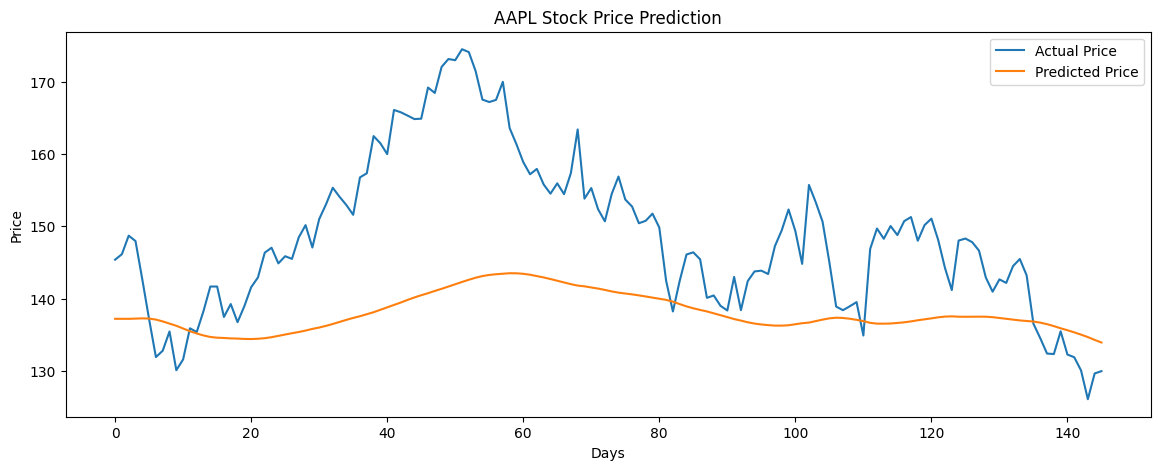

In [ ]:
#lstm prediction model

import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn .metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Load stock data using yfinance
def load_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Close'].values.reshape(-1, 1)

# Preprocess the data: scale and create sequences for training
def preprocess_data(data, look_back=30):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(look_back, len(scaled_data)):
        X.append(scaled_data[i-look_back:i, 0])
        y.append(scaled_data[i, 0])

    X = np.array(X)
    y = np.array(y)

    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, y, scaler

# Build the LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(16, return_sequences=True, input_shape=input_shape, kernel_regularizer=l2(0.005)),
        Dropout(0.3),
        LSTM(8, return_sequences=False, kernel_regularizer=l2(0.005)),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(X_train, y_train, validation_split=0.2, batch_size=16, verbose=1, callbacks=[early_stopping])

    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    return predictions, mse, rmse

# Load and preprocess data
ticker = 'AAPL'
data = load_stock_data(ticker, '2020-01-01', '2023-01-01')

look_back = 30
X, y, scaler = preprocess_data(data, look_back)

split_percent = 0.8
split = int(split_percent * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Create and train the model
lstm_model = create_lstm_model((X_train.shape[1], 1))
predictions, mse, rmse = train_and_evaluate(lstm_model, X_train, y_train, X_test, y_test)

predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

accuracy = 100 - (rmse / np.mean(y_test)) * 100

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


Mean Squared Error (MSE): 0.0033
Root Mean Squared Error (RMSE): 0.0572
R-squared (R2): 0.5713
Accuracy: 99.96%


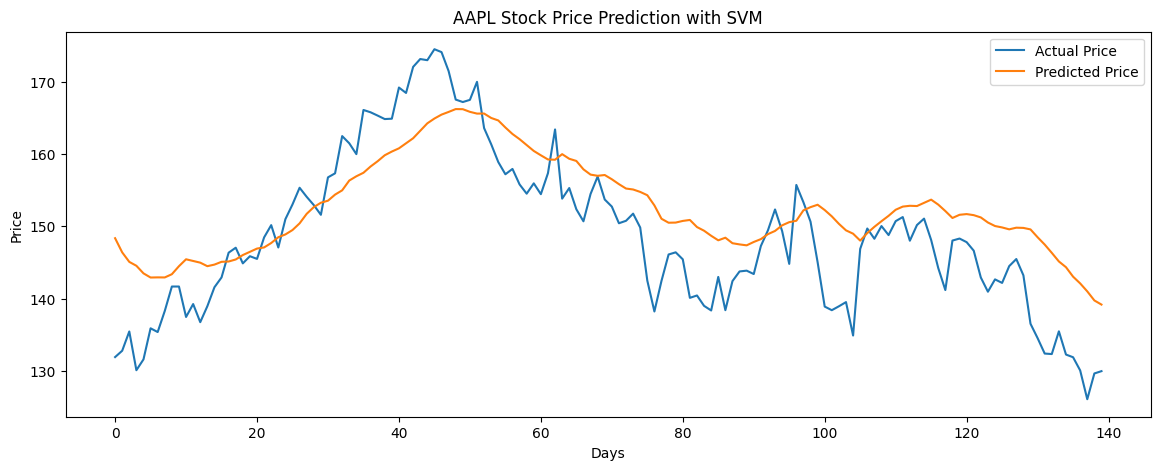

In [ ]:
#svm prediction model

import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Load stock data using yfinance
def load_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Close'].values.reshape(-1, 1)  # Use 'Close' prices only

# Preprocess the data: scale and create sequences for training
def preprocess_data(data, look_back=60):
    scaler = MinMaxScaler(feature_range=(0, 1))  # Scale between 0 and 1
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(look_back, len(scaled_data)):
        X.append(scaled_data[i-look_back:i, 0])  # Past 60 days as features
        y.append(scaled_data[i, 0])              # 61st day as target

    X = np.array(X)
    y = np.array(y)

    return X, y, scaler

# Train and evaluate the SVM model
def train_and_evaluate_svm(X_train, y_train, X_test, y_test):
    model = SVR(kernel='rbf')  # Using RBF kernel
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate Mean Squared Error and R-squared
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    return predictions, mse, rmse, r2

# Load data for a specific stock (e.g., Apple) and preprocess
ticker = 'AAPL'
data = load_stock_data(ticker, '2020-01-01', '2023-01-01')

# Preprocess data: Create sequences from stock price data (60 days as look-back)
look_back = 60
X, y, scaler = preprocess_data(data, look_back)

# Split the data into training and testing sets (80% training, 20% testing)
split_percent = 0.8
split = int(split_percent * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Train and evaluate the SVM model
predictions, mse, rmse, r2 = train_and_evaluate_svm(X_train, y_train, X_test, y_test)

# Inverse transform predictions and actual values to get them back to original scale
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate accuracy as (1 - RMSE / mean of actual prices)
accuracy = 100 - (rmse / np.mean(y_test)) * 100

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

# Display predictions vs actual values for comparison
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title(f"{ticker} Stock Price Prediction with SVM")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index 

Mean Squared Error (MSE): 182.1060
Root Mean Squared Error (RMSE): 13.4947
Accuracy: 90.91%


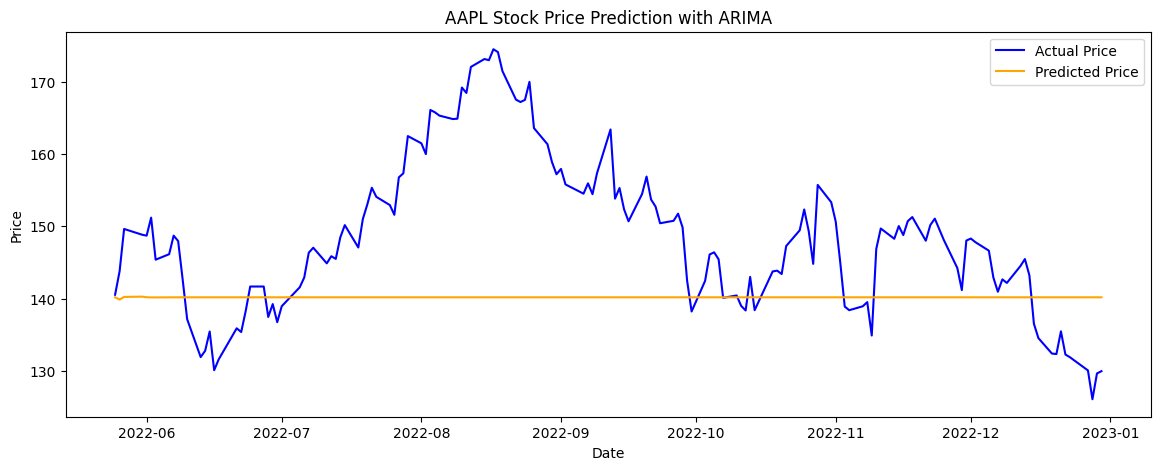

In [ ]:
#arima prediction model

import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load stock data using yfinance
def load_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Close']

# Train and evaluate the ARIMA model
def train_and_evaluate_arima(train_data, test_data, order=(5, 1, 0)):
    # Fit the ARIMA model
    model = ARIMA(train_data, order=order)
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.forecast(steps=len(test_data))
    return predictions, model_fit

# Load data for a specific stock (e.g., Apple)
ticker = 'AAPL'
data = load_stock_data(ticker, '2020-01-01', '2023-01-01')

# Split the data into training and testing sets (80% training, 20% testing)
split_percent = 0.8
split = int(split_percent * len(data))
train_data, test_data = data[:split], data[split:]

# Train and evaluate the ARIMA model
predictions, model_fit = train_and_evaluate_arima(train_data, test_data)

# Calculate Mean Squared Error
mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)

# Calculate accuracy as (1 - RMSE / mean of actual prices)
accuracy = 100 - (rmse / np.mean(test_data)) * 100

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(test_data.index, test_data, label='Actual Price', color='blue')
plt.plot(test_data.index, predictions, label='Predicted Price', color='orange')
plt.title(f"{ticker} Stock Price Prediction with ARIMA")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


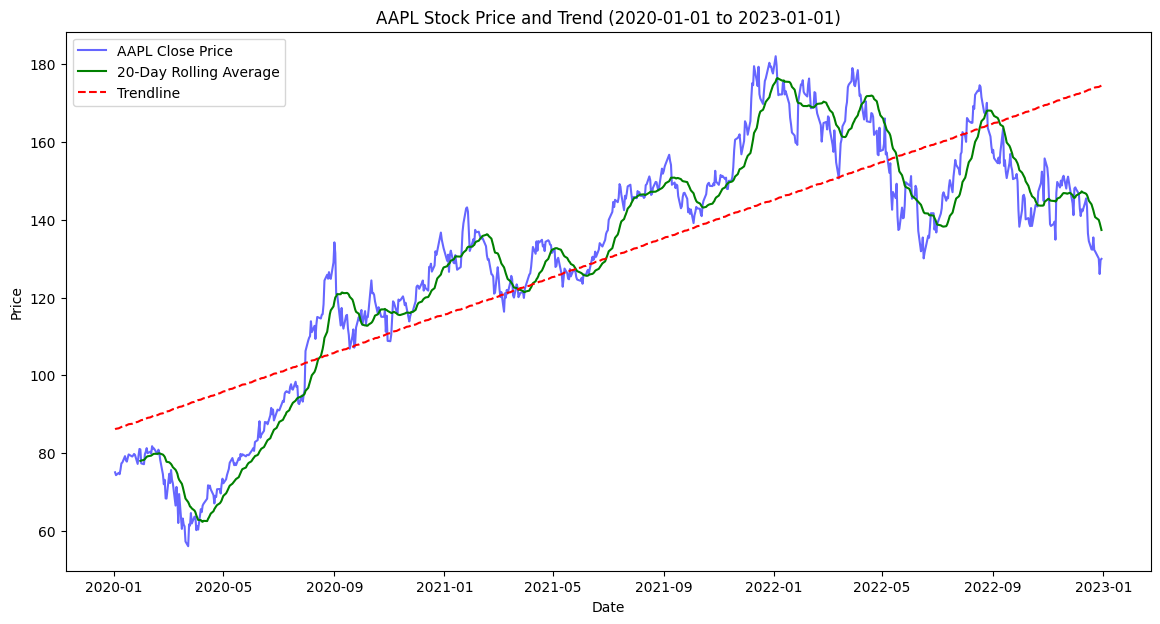

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load stock data using yfinance
def load_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Calculate and plot trendline
def plot_trendline(dates, prices, ax):
    # Reshape dates for linear regression
    X = np.arange(len(dates)).reshape(-1, 1)
    y = prices.values

    # Linear regression to find the trend
    model = LinearRegression()
    model.fit(X, y)

    # Generate trendline
    trend = model.predict(X)

    # Plot the trendline
    ax.plot(dates, trend, label='Trendline', color='red', linestyle='--')

# Plot stock price and fluctuation trend
def plot_stock_trend(ticker, start_date, end_date, window=20):
    # Load stock data
    data = load_stock_data(ticker, start_date, end_date)

    # Use the 'Close' price for analysis
    closing_prices = data['Close']

    # Create a rolling average to smooth out the fluctuations
    rolling_avg = closing_prices.rolling(window=window).mean()

    # Plot stock prices and trend
    fig, ax = plt.subplots(figsize=(14, 7))

    # Plot the actual closing prices
    ax.plot(closing_prices.index, closing_prices, label=f'{ticker} Close Price', color='blue', alpha=0.6)

    # Plot the rolling average (smoothed trend)
    ax.plot(closing_prices.index, rolling_avg, label=f'{window}-Day Rolling Average', color='green')

    # Plot trendline based on linear regression
    plot_trendline(closing_prices.index, closing_prices, ax)

    # Set plot titles and labels
    ax.set_title(f'{ticker} Stock Price and Trend ({start_date} to {end_date})')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()

    plt.show()

# Run the analysis for a specific stock
ticker = 'AAPL'  # Example: Apple stock
start_date = '2020-01-01'
end_date = '2023-01-01'
plot_stock_trend(ticker, start_date, end_date)


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.1246 - val_loss: 0.0288
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0115 - val_loss: 0.0051
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0083 - val_loss: 0.0035
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0086 - val_loss: 0.0033
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0071 - val_loss: 0.0038
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0074 - val_loss: 0.0034
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0068 - val_loss: 0.0032
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0069 - val_loss: 0.0040
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0058 - val_loss: 0.0030
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0051 - val_loss: 0.0029
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0061 - val_loss: 0.0041
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0

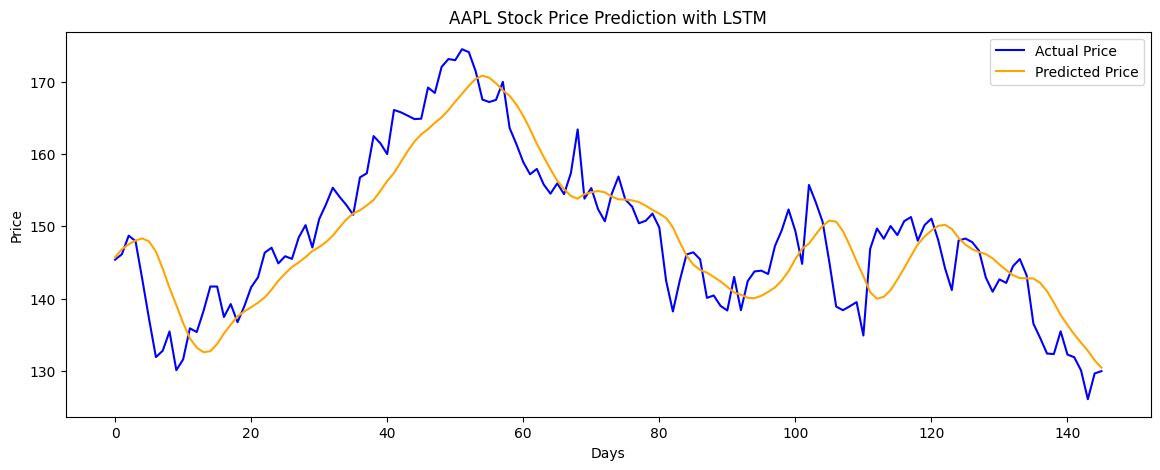

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load stock data using yfinance
def load_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Close'].values.reshape(-1, 1)  # Use 'Close' prices only

# Preprocess the data: scale and create sequences for training
def preprocess_data(data, look_back=30):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(look_back, len(scaled_data)):
        X.append(scaled_data[i-look_back:i, 0])
        y.append(scaled_data[i, 0])

    X = np.array(X)
    y = np.array(y)

    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, y, scaler

# Build the LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(25, return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(X_train, y_train, validation_split=0.2, batch_size=16, epochs=50, verbose=1, callbacks=[early_stopping])
    predictions = model.predict(X_test)
    return predictions

# Load and preprocess data
ticker = 'AAPL'
data = load_stock_data(ticker, '2020-01-01', '2023-01-01')

look_back = 30
X, y, scaler = preprocess_data(data, look_back)

# Split the data into training and testing sets (80% training, 20% testing)
split_percent = 0.8
split = int(split_percent * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Create and train the model
lstm_model = create_lstm_model((X_train.shape[1], 1))
predictions = train_and_evaluate(lstm_model, X_train, y_train, X_test, y_test)

# Inverse transform predictions and actual values to get them back to original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Calculate accuracy as (1 - RMSE / mean of actual prices)
accuracy = 100 - (rmse / np.mean(y_test)) * 100

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

# Plot results
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='orange')
plt.title(f"{ticker} Stock Price Prediction with LSTM")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


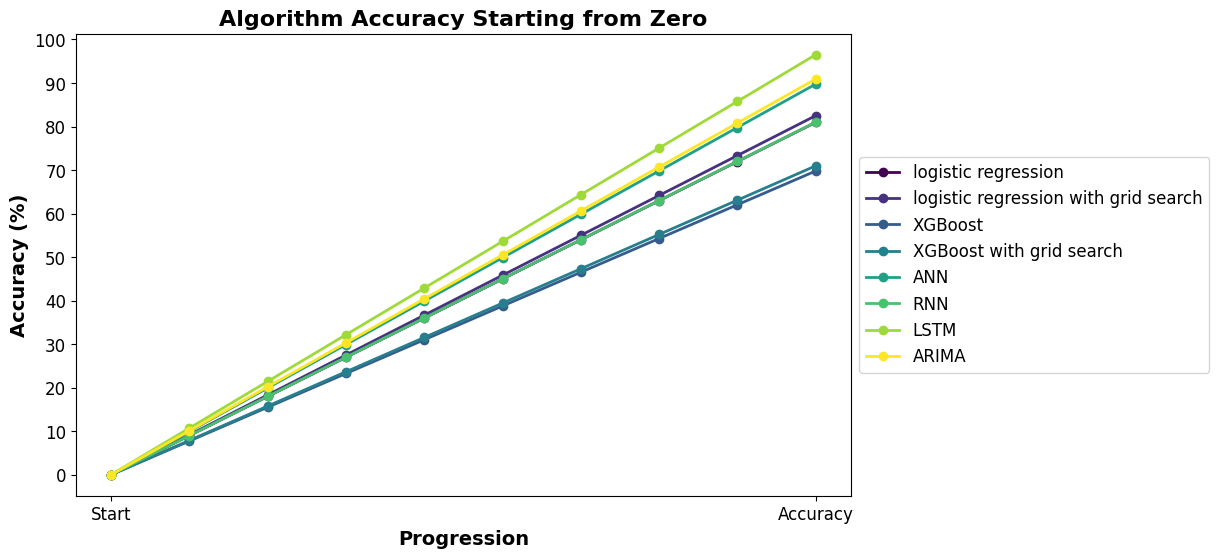

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Algorithms and their final accuracies
algorithms = ['logistic regression', 'logistic regression with grid search', 'XGBoost', 'XGBoost with grid search',
              'ANN', 'RNN', 'LSTM', 'ARIMA']
final_accuracies = [80.96, 82.50, 69.78, 70.97, 89.75, 81.00, 96.50, 90.91]

# Create a figure
plt.figure(figsize=(10,6))

# Define colors for each algorithm
colors = plt.cm.viridis(np.linspace(0, 1, len(algorithms)))

# Plot each algorithm starting from 0 to the final accuracy, with gradual increase
for i, algorithm in enumerate(algorithms):
    x = np.linspace(0, 1, 10)  # 10 points from 0 to 1
    y = np.linspace(0, final_accuracies[i], 10)  # Gradual increase from 0 to final accuracy
    plt.plot(x, y, label=algorithm, color=colors[i], marker='o', markersize=6, linewidth=2)

# Add labels and title with enhanced styling
plt.xlabel('Progression', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
plt.title('Algorithm Accuracy Starting from Zero', fontsize=16, fontweight='bold')

# Customize ticks for better readability
plt.xticks([0, 1], ['Start', 'Accuracy'], fontsize=12)
plt.yticks(np.arange(0, 101, 10), fontsize=12)

# Add a legend to distinguish algorithms, placed outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

candle stick analysis